# 1. Scipy.stats를 활용한 카테고리 확률변수 시뮬레이션


    
    - 카테고리 분포의 클래스 별도 존재하지 않음
    
    - 다항분포 클래스에서 n=1(1회 시행)로 카테고리분포 설정 가능
    
    - 이론적으로 분포를 임의로 그려보기 vs 실제로 확률변수에서 표본을 샘플링 해 분포 그리기
    
    
```

[샘플링을 통한 시뮬레이션]

1. 확률변수 생성
2. 샘플링     
3. 확률변수 값 생성
    - 배열로 생성
    
4. 확률값 생성
    - 샘플링 결과를 각 열벡터 별 sum => 빈도 확률로 계산( / len(x) )

5. 분포 그리기


[이론적 분포 그리기]

1. 확률변수 생성
    - np.arange => 원핫인코딩

2. 확률변수 값 생성
    - 원핫인코딩 결과에서 values 추출값을 pmf에 넣어야함

3. 확률값 생성
    - 이론적 생성박스 사용
    
4. 분포 그리기


```

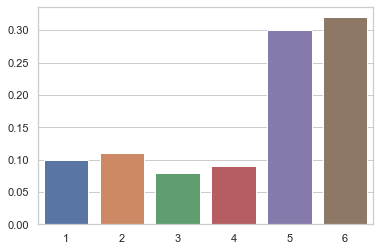

In [27]:
# 샘플링을 통한 시뮬레이션

# 1. 확률변수 생성
mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(1,mu)

# 2. 샘플링
xx = rv.rvs(100)

# 3. 확률변수 값 생성
x = np.arange(1,6+1)

# 4. 확률 값 생성
y = xx.sum(axis=0) / len(xx)

# 5. 분포 그리기
sns.barplot(x,y)


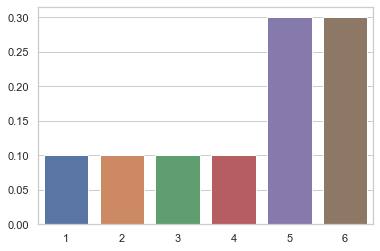

In [81]:
# 샘플링 없이 이론적 분포 그리기

# 1. 확률변수 생성
mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(1,mu)

# 2. 확률변수 값 생성 -> 원핫인코딩!
x = np.arange(1,6+1)
x_ohe = pd.get_dummies(x)

# 3. 확률 값 생성 -> 원핫인코딩에서 밸류값만 추출 후 대입
y = rv.pmf(x_ohe.values)

# 4. 분포 그리기
sns.barplot(x,y)

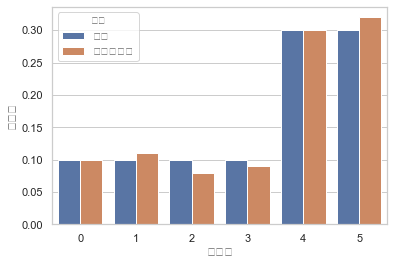

In [53]:
# 시뮬레이션과 이론 비교

df = pd.DataFrame({"이론": rv.pmf(x_ohe.values),"시뮬레이션":xx.sum(axis=0)/len(xx)}).stack()
df = df.reset_index()
df.columns = ['표본값','유형','확률값']
sns.barplot(x='표본값',y='확률값',hue='유형',data=df)

# 2. Scipy.stats를 활용한 다항분포 확률변수 시뮬레이션

    - multinomial 클래스 활용

    - 이론적으로 분포를 임의로 그려보기 vs 실제로 확률변수에서 표본을 샘플링 해 분포 그리기
    
    
```

[샘플링을 통한 시뮬레이션]

1. 확률변수 생성
2. 샘플링     
3. 확률변수 값 생성
    - 배열로 생성
    
4. 확률값 생성
    - 샘플링 결과를 각 열벡터 별 sum => 빈도 확률로 계산( / len(x) )

5. 분포 그리기


[이론적 분포 그리기]

1. 확률변수 생성

2. 확률변수 값 생성
    - 배열로 생성

3. 확률값 생성
    - 이론적 생성박스 사용
    - pmf메서드에 입력 시, 더미화 후 value값만 넣어줘야 함
        
4. 분포 그리기


```

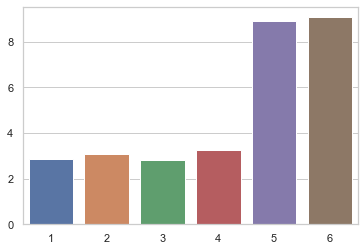

In [58]:
# 샘플링을 통한 시뮬레이션

# 1. 확률변수 생성
n = 30
mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(n,mu)

# 2. 샘플링
xx = rv.rvs(100,random_state=0)

# 3. 확률변수 값 생성
x = np.arange(1,6+1)

# 4. 확률값 생성
y = xx.sum(axis=0) / len(xx)

# 5. 분포 그리기
sns.barplot(x,y)